# 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler



# 2. Load the dataset

In [2]:
df = pd.read_csv('https://github-data-bucket.s3.amazonaws.com/chronic_kidney_disease.csv')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,normal,normal,notpresent,notpresent,121.0000,...,44.0,7800.0,5.20000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,normal,normal,notpresent,notpresent,131.7525,...,38.0,6000.0,3.16575,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0000,...,31.0,7500.0,3.16575,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0000,...,32.0,6700.0,3.90000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0000,...,35.0,7300.0,4.60000,no,no,no,good,no,no,ckd


# 3. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    int64  
 4   su      400 non-null    int64  
 5   rbc     400 non-null    object 
 6   pc      400 non-null    object 
 7   pcc     400 non-null    object 
 8   ba      400 non-null    object 
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    float64
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    object 
 19  dm      400 non-null    object 
 20  cad     400 non-null    object 
 21  appet   400 non-null    object 
 22  pe

In [4]:
# checking the cloumns in the data
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [5]:
df.nunique()

age       77
bp        11
sg         5
al         6
su         6
rbc        2
pc         2
pcc        2
ba         2
bgr      147
bu       119
sc        85
sod       35
pot       41
hemo     116
pcv       43
wbcc      90
rbcc      46
htn        2
dm         3
cad        2
appet      2
pe         2
ane        2
class      2
dtype: int64

Each row in the dataset represents a patient, and the columns correspond to different features or attributes of the patients. Here's a breakdown of the columns you've mentioned:

- `age`: The age of the patient (in years)
- `bp`: Blood pressure of the patient (measured in mmHg)
- `sg`: Specific gravity of urine
- `al`: Albumin present in the urine
- `su`: Sugar present in the urine
- `rbc`: Red blood cells in urine (either "normal" or "abnormal")
- `pc`: Pus cell in urine (either "normal" or "abnormal")
- `pcc`: Pus cell clumps in urine (either "present" or "not present")
- `ba`: Bacteria present in urine (either "present" or "not present")
- `bgr`: Blood glucose random (measured in mg/dL)
- `pcv`: Packed cell volume
- `wbcc`: White blood cell count (measured in cells/cubic mm)
- `rbcc`: Red blood cell count (measured in millions/cubic mm)
- `htn`: Whether the patient has hypertension (either "yes" or "no")
- `dm`: Whether the patient has diabetes mellitus (either "yes" or "no")
- `cad`: Whether the patient has coronary artery disease (either "yes" or "no")
- `appet`: Patient's appetite (either "good" or "poor")
- `pe`: Presence of pedal edema (either "yes" or "no")
- `ane`: Presence of anemia (either "yes" or "no")
- `class`: The target variable, indicating the presence or absence of chronic kidney disease (either "ckd" or "notckd")





In [6]:
# checking the unique values in the target values
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

**"ckd"** refers to **chronic kidney disease**, while **"notckd"** indicates the absence of **chronic kidney disease**. The "class" column serves as the target variable that classifies whether a patient has chronic kidney disease or not based on the given features.

In [7]:
# shape of the data
df.shape

(400, 25)

In [8]:
# check null values
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

ckd       250
notckd    150
Name: class, dtype: int64


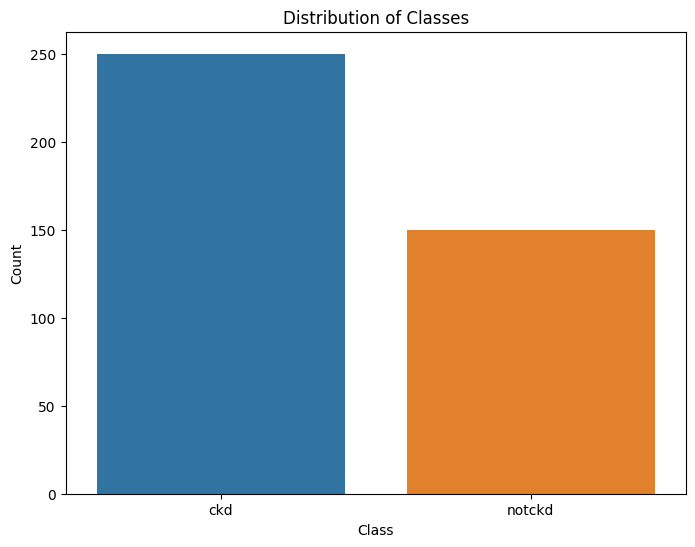

In [9]:
# check for the Target Variable Distribution
target_counts = df['class'].value_counts()
print(target_counts)


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


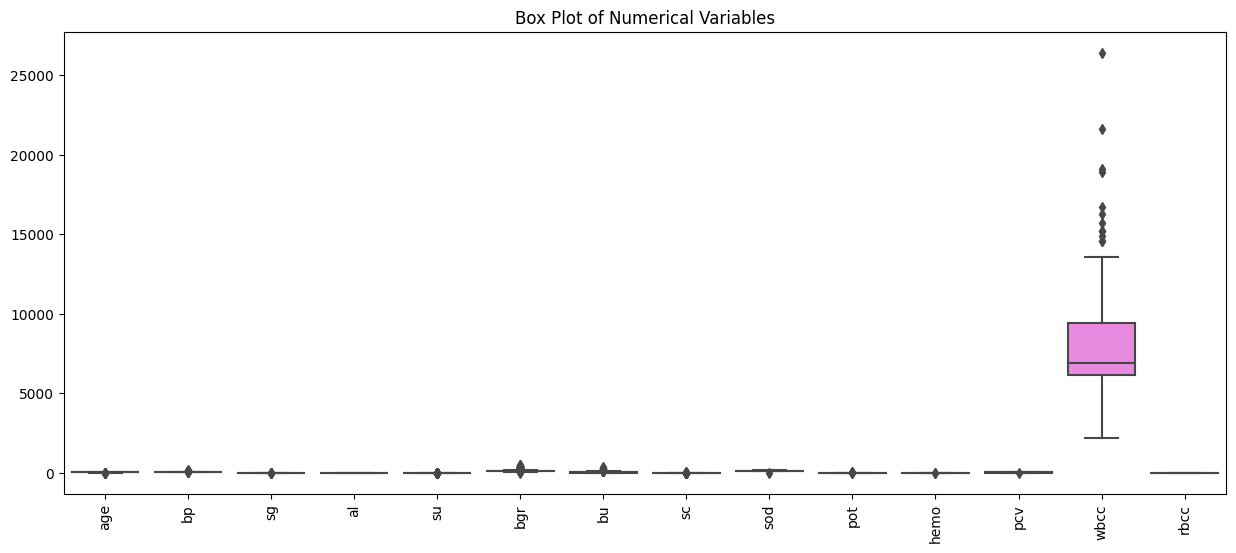

In [10]:
# check for the outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Numerical Variables')
plt.xticks(rotation=90)
plt.show()

In [11]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.457313,76.400250,1.017712,0.90000,0.395000,146.245275,57.296155,3.066905,131.022784,4.403285,12.314740,37.659394,7815.802500,4.202533
std,16.975838,13.481993,0.005434,1.31313,1.040038,74.956438,49.289311,5.617552,15.407223,2.851219,2.770967,8.568101,2708.430129,1.109466
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,124.000000,3.609250,10.873500,31.982500,6178.500000,3.165750
50%,54.000000,77.087500,1.020000,0.00000,0.000000,126.000000,44.000000,1.400000,136.000000,4.050000,12.000000,37.000000,6900.000000,4.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.941875,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


<ipython-input-12-a793dc6b119f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


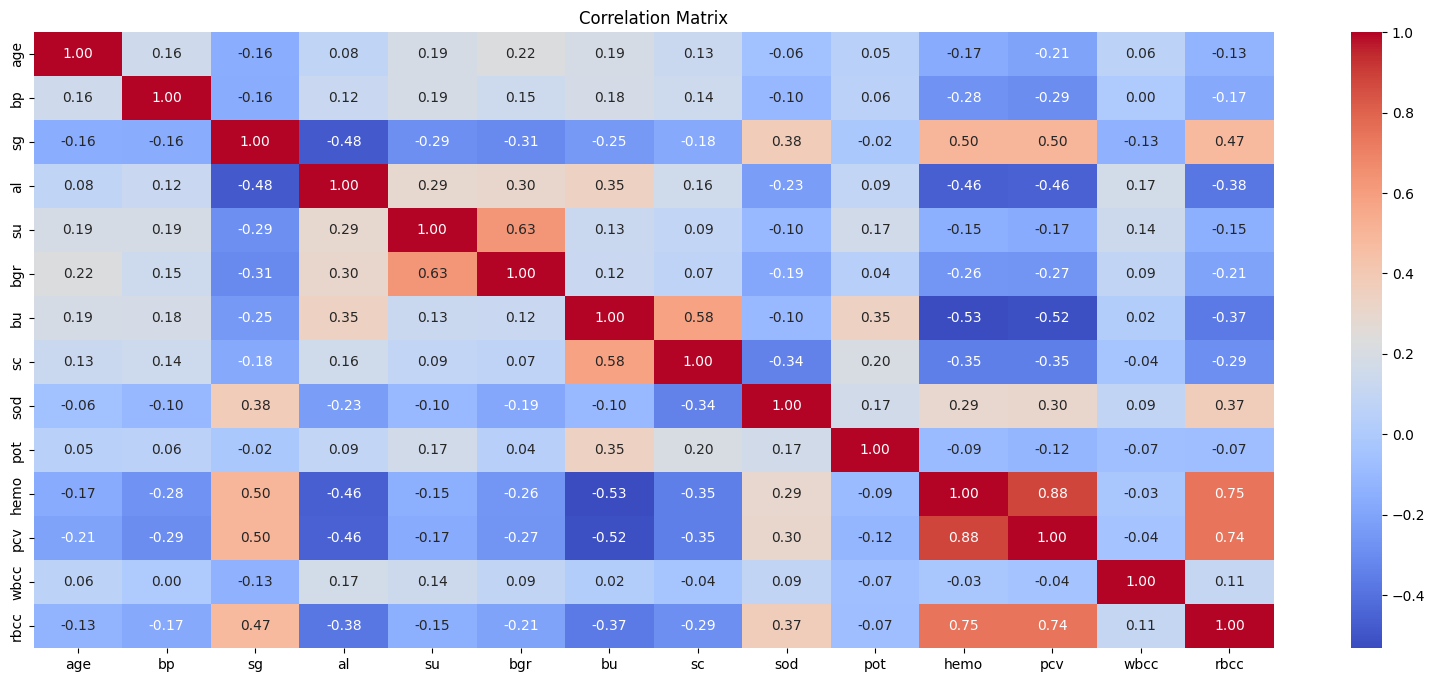

In [12]:
# check the correlation of the data
correlation_matrix = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

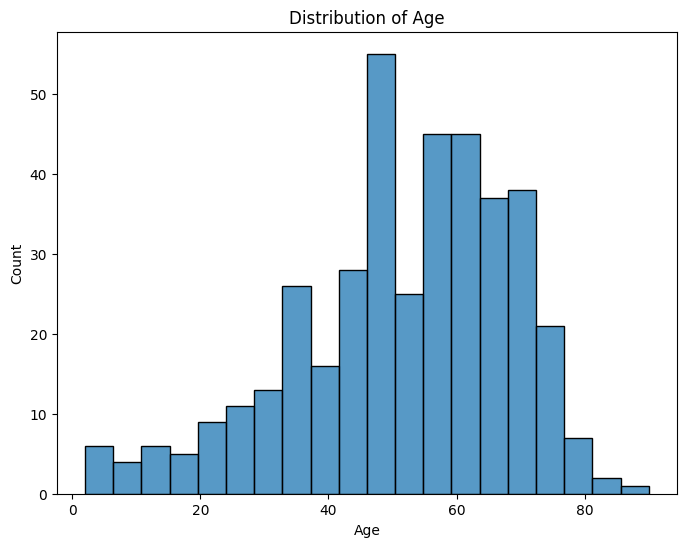

In [13]:
# Distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

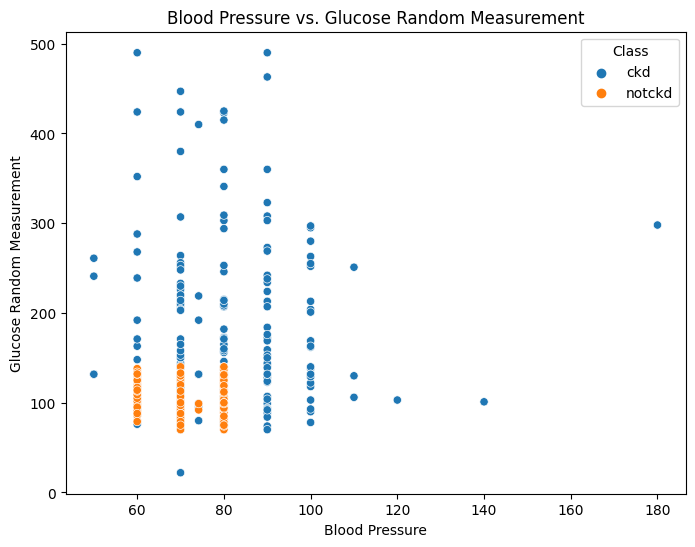

In [14]:
# Scatter plot of blood pressure (bp) vs. glucose random measurement (bgr)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bp', y='bgr', hue='class')
plt.title('Blood Pressure vs. Glucose Random Measurement')
plt.xlabel('Blood Pressure')
plt.ylabel('Glucose Random Measurement')
plt.legend(title='Class')
plt.show()

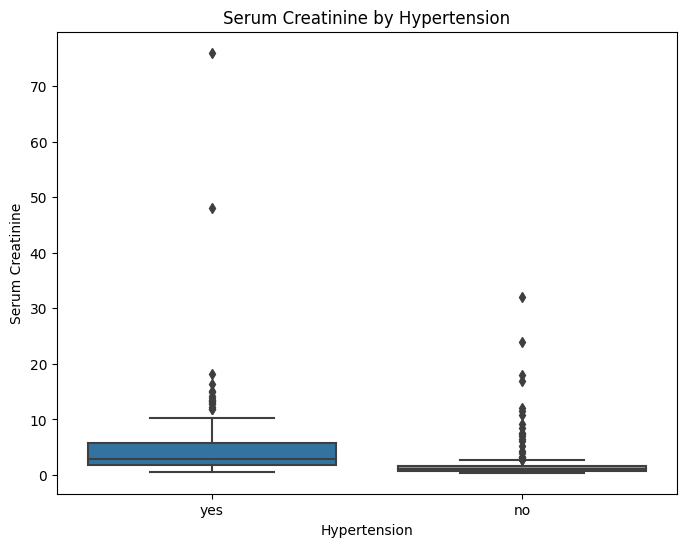

In [15]:
# Box plot of serum creatinine (sc) by presence of hypertension (htn)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='htn', y='sc')
plt.title('Serum Creatinine by Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Serum Creatinine')
plt.show()

<Figure size 1000x800 with 0 Axes>

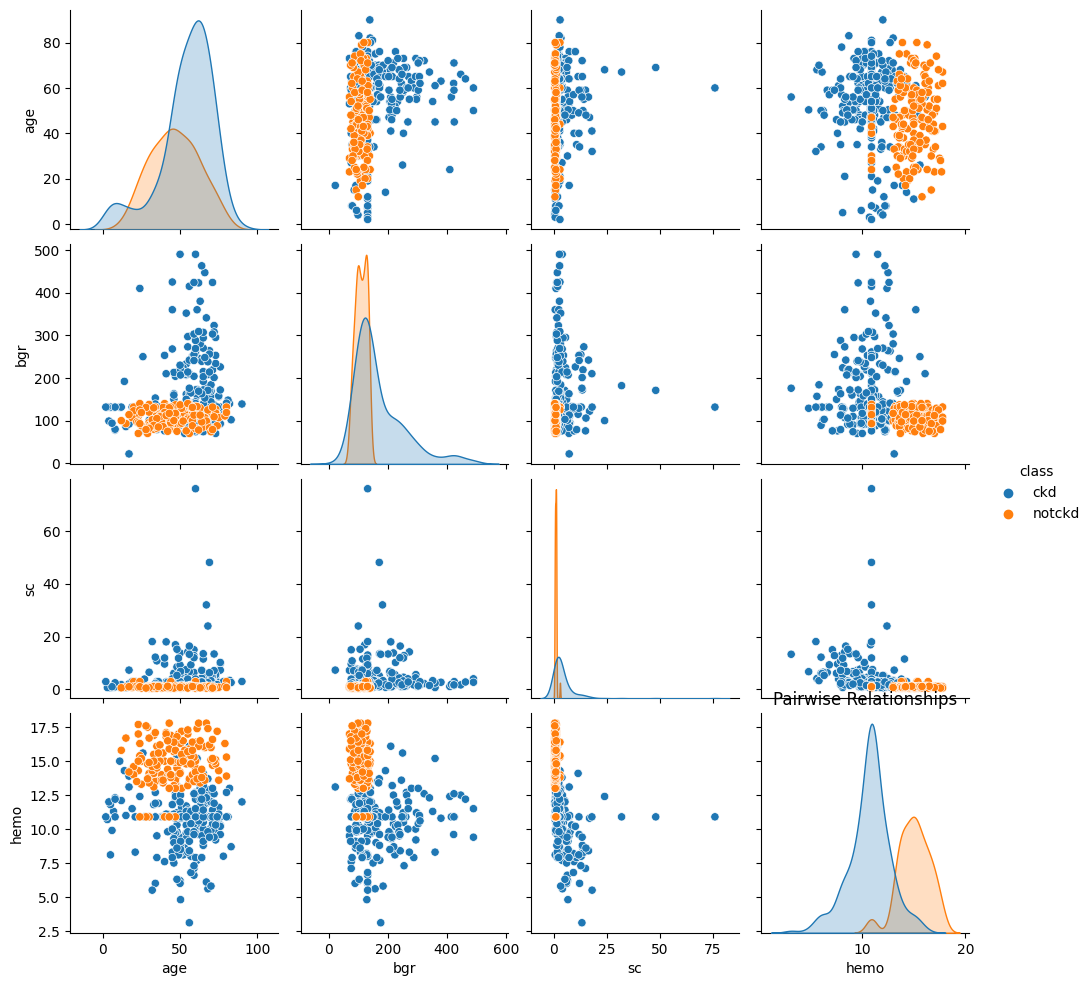

In [16]:
#  visualize pairwise relationships between multiple variables, highlighting different classes.
plt.figure(figsize=(10, 8))
sns.pairplot(data=df, vars=['age', 'bgr', 'sc', 'hemo'], hue='class')
plt.title('Pairwise Relationships')
plt.show()

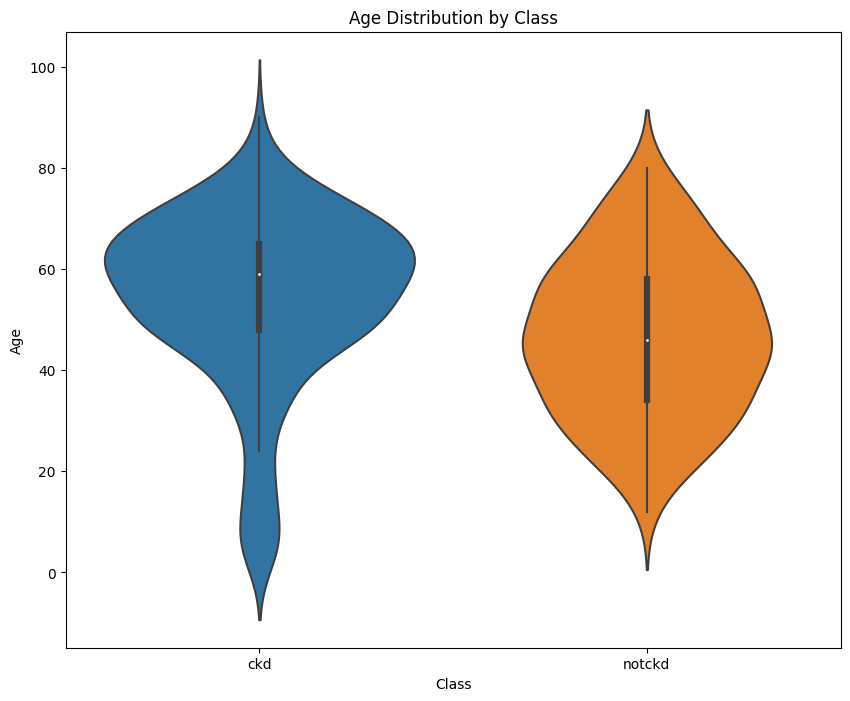

In [17]:
# visualize the distribution of a continuous variable (age) across different classes
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='class', y='age')
plt.title('Age Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()


<ipython-input-18-e424753fdc10>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='class', y='hemo', ci='sd')


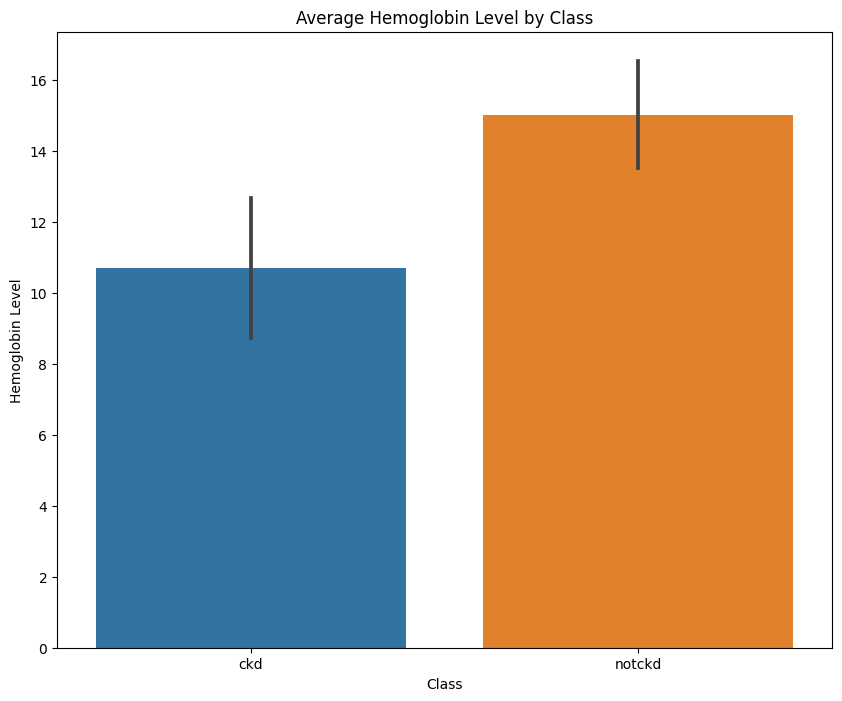

In [18]:
# plot displays the average hemoglobin level for each class, along with error bars representing the standard deviation.
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x='class', y='hemo', ci='sd')
plt.title('Average Hemoglobin Level by Class')
plt.xlabel('Class')
plt.ylabel('Hemoglobin Level')
plt.show()


# 4. Data Cleaning and Preprocessing:

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    int64  
 4   su      400 non-null    int64  
 5   rbc     400 non-null    object 
 6   pc      400 non-null    object 
 7   pcc     400 non-null    object 
 8   ba      400 non-null    object 
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    float64
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    object 
 19  dm      400 non-null    object 
 20  cad     400 non-null    object 
 21  appet   400 non-null    object 
 22  pe

In [20]:
# Select the categorical variables to encode
categorical_vars = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
for var in categorical_vars:
    df[var] = label_encoder.fit_transform(df[var])

In [21]:
# Feature Engineering


# Calculate Mean Corpuscular Volume (MCV)
pcv_values = np.nan_to_num(df['pcv'].values)
rbc_values = np.nan_to_num(df['rbc'].values)
mcv_values = np.divide(pcv_values, rbc_values)
mcv_values = np.where(np.isfinite(mcv_values), mcv_values, 0)  # Replace infinity with 0
df['mcv'] = np.round(mcv_values, 2)

# Calculate Glucose-to-Blood Pressure Ratio
df['glucose_bp_ratio'] = (df['bgr'] / df['bp']).apply(lambda x: round(x, 2) if np.isfinite(x) else x)

# Total Blood Cell Count
df['total_blood_cell_count'] = df['rbcc'] + df['wbcc']

# Anemia Indicator
df['anemia'] = np.where(df['hemo'] < 12, 1, 0)

# Blood Pressure Category
#df['bp_category'] = pd.cut(df['bp'], bins=[0, 120, 130, np.inf], labels=['0', '1', '2'], right=False)
df['bp_category'] = pd.cut(df['bp'], bins=[0, 120, 130, np.inf], labels=[0, 1, 2], right=False).astype(int)

# Display the updated dataset with new features
df.head()




<ipython-input-21-f8a5cfd4bcf1>:7: RuntimeWarning: divide by zero encountered in true_divide
  mcv_values = np.divide(pcv_values, rbc_values)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,cad,appet,pe,ane,class,mcv,glucose_bp_ratio,total_blood_cell_count,anemia,bp_category
0,48.0,80.0,1.020,1,0,1,1,0,0,121.0000,...,0,0,0,0,ckd,44.0,1.51,7805.20000,0,0
1,7.0,50.0,1.020,4,0,1,1,0,0,131.7525,...,0,0,0,0,ckd,38.0,2.64,6003.16575,1,0
2,62.0,80.0,1.010,2,3,1,1,0,0,423.0000,...,0,1,0,1,ckd,31.0,5.29,7503.16575,1,0
3,48.0,70.0,1.005,4,0,1,0,1,0,117.0000,...,0,1,1,1,ckd,32.0,1.67,6703.90000,1,0
4,51.0,80.0,1.010,2,0,1,1,0,0,106.0000,...,0,0,0,0,ckd,35.0,1.32,7304.60000,1,0


- **Mean Corpuscular Volume (MCV)**: the patient's red blood cell count (rbc) and packed cell volume (pcv), you can calculate the mean corpuscular volume (MCV), which represents the average volume of red blood cells. MCV can be calculated using the formula: MCV = pcv / rbc.

- **Glucose-to-Blood Pressure Ratio:** the ratio between the blood glucose random level (bgr) and the blood pressure (bp) of the patients. This ratio can provide insights into the relationship between glucose levels and blood pressure.

- **Total Blood Cell Count:** Combination of the red blood cell count (rbcc) and white blood cell count (wbcc) to create a new feature representing the total blood cell count.

- **Anemia Indicator**: a binary feature indicating the presence or absence of anemia based on the hemo (hemoglobin) level.

- **Blood Pressure Category:** Categorize blood pressure (bp) values into different categories such as **"low = 0," "normal = 1," and "high = 3."**

In [22]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class', 'mcv', 'glucose_bp_ratio',
       'total_blood_cell_count', 'anemia', 'bp_category'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     400 non-null    float64
 1   bp                      400 non-null    float64
 2   sg                      400 non-null    float64
 3   al                      400 non-null    int64  
 4   su                      400 non-null    int64  
 5   rbc                     400 non-null    int64  
 6   pc                      400 non-null    int64  
 7   pcc                     400 non-null    int64  
 8   ba                      400 non-null    int64  
 9   bgr                     400 non-null    float64
 10  bu                      400 non-null    float64
 11  sc                      400 non-null    float64
 12  sod                     400 non-null    float64
 13  pot                     400 non-null    float64
 14  hemo                    400 non-null    fl

In [24]:
# Separate the features (X) and target variable (y)
X = df.drop('class', axis=1)
y = df['class']

In [25]:
# Define the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling to the feature matrix X and target variable y
X_res, y_res = rus.fit_resample(X, y)


ckd       150
notckd    150
Name: class, dtype: int64


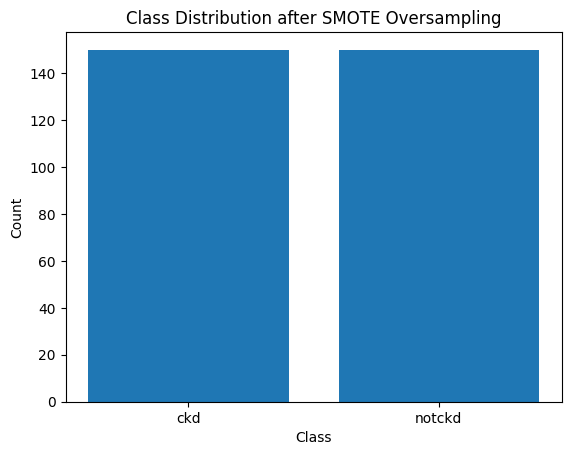

In [26]:
# Convert the target variable to a DataFrame (assuming it is a pandas Series)
y_res_df = pd.DataFrame(y_res, columns=['class'])

# Count the occurrences of each class in the target variable
class_counts = y_res_df['class'].value_counts()

# Print the class counts
print(class_counts)


# Create a bar chart to visualize the class balance
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution after Undersampling')
plt.show()



In [27]:
# Split the data into train and test sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Train set shape:", X_train_s.shape, y_train_s.shape)
print("Test set shape:", X_test_s.shape, y_test_s.shape)

Train set shape: (240, 29) (240,)
Test set shape: (60, 29) (60,)


# 5. Choose, train and avaluation of Model

In [28]:
# Create an instance of Logistic Regression
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train_s, y_train_s)

# Make predictions on the test data
test_preds = logreg.predict(X_test_s)

# Print the classification report for the test set
test_accuracy = accuracy_score(y_test_s, test_preds)
print("Test Accuracy:", test_accuracy)
print("Classification Report for Test Set:")
print(classification_report(y_test_s, test_preds))

# Make predictions on the training data
train_preds = logreg.predict(X_train_s)

# Print the classification report for the training set
train_accuracy = accuracy_score(y_train_s, train_preds)
print("Training Accuracy:", train_accuracy)
print("Classification Report for Training Set:")
print(classification_report(y_train_s, train_preds))

Test Accuracy: 0.9833333333333333
Classification Report for Test Set:
              precision    recall  f1-score   support

         ckd       1.00      0.97      0.98        29
      notckd       0.97      1.00      0.98        31

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Training Accuracy: 0.9333333333333333
Classification Report for Training Set:
              precision    recall  f1-score   support

         ckd       0.96      0.91      0.93       121
      notckd       0.91      0.96      0.93       119

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.93       240
weighted avg       0.93      0.93      0.93       240



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# Create the Random Forest classifier

clf = RandomForestClassifier(n_estimators=100)

# Train the classifier
clf.fit(X_train_s, y_train_s)

# Predict on the training set
train_preds4 = clf.predict(X_train_s)
train_accuracy4 = accuracy_score(y_train_s, train_preds4)
print("Training Accuracy:", train_accuracy4)

# Print the classification report for the training set
print("Classification Report for Training Set:")
print(classification_report(y_train_s, train_preds4))


# Predict on the test set
test_preds4 = clf.predict(X_test_s)
test_accuracy4 = accuracy_score(y_test_s, test_preds4)
print("Test Accuracy:", test_accuracy4)

# Classification report for test set
print("Classification Report for Test Set:")
print(classification_report(y_test_s, test_preds4))


Training Accuracy: 1.0
Classification Report for Training Set:
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00       121
      notckd       1.00      1.00      1.00       119

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Test Accuracy: 1.0
Classification Report for Test Set:
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        29
      notckd       1.00      1.00      1.00        31

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [30]:
# Create the gradient boosting classifier

gbc = GradientBoostingClassifier()

# Train the classifier
gbc.fit(X_train_s, y_train_s)

# Predict on the training set
train_preds1 = gbc.predict(X_train_s)
train_accuracy1 = accuracy_score(y_train_s, train_preds1)
print("Training Accuracy:", train_accuracy1)

# Print the classification report for the training set
print("Classification Report for Training Set:")
print(classification_report(y_train_s, train_preds1))

# Predict on the test set
test_preds1 = gbc.predict(X_test_s)
test_accuracy1 = accuracy_score(y_test_s, test_preds1)
print("Test Accuracy:", test_accuracy1)

# Classification report for test set
print("Classification Report for Test Set:")
print(classification_report(y_test_s, test_preds1))


Training Accuracy: 1.0
Classification Report for Training Set:
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00       121
      notckd       1.00      1.00      1.00       119

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Test Accuracy: 1.0
Classification Report for Test Set:
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        29
      notckd       1.00      1.00      1.00        31

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [31]:
# Create a decision tree classifier

dtree = DecisionTreeClassifier()

# Train the classifier
dtree.fit(X_train_s, y_train_s)

# Predict on the training set
train_preds2 = dtree.predict(X_train_s)
train_accuracy2 = accuracy_score(y_train_s, train_preds2)
print("Training Accuracy:", train_accuracy2)

# Print the classification report for the training set
print("Classification Report for Training Set:")
print(classification_report(y_train_s, train_preds2))

# Predict on the test set
test_preds2 = dtree.predict(X_test_s)
test_accuracy2 = accuracy_score(y_test_s, test_preds2)
print("Test Accuracy:", test_accuracy2)

# Classification report for test set
print("Classification Report for Test Set:")
print(classification_report(y_test_s, test_preds2))


Training Accuracy: 1.0
Classification Report for Training Set:
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00       121
      notckd       1.00      1.00      1.00       119

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Test Accuracy: 1.0
Classification Report for Test Set:
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        29
      notckd       1.00      1.00      1.00        31

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [32]:
# Create a decision tree classifier


svc = SVC()

# Train the classifier
svc.fit(X_train_s, y_train_s)

# Predict on the training set
train_preds3 = svc.predict(X_train_s)
train_accuracy3 = accuracy_score(y_train_s, train_preds3)
print("Training Accuracy:", train_accuracy3)

# Print the classification report for the training set
print("Classification Report for Training Set:")
print(classification_report(y_train_s, train_preds3))

# Predict on the test set
test_preds3 = dtree.predict(X_test_s)
test_accuracy3 = accuracy_score(y_test_s, test_preds3)
print("Test Accuracy:", test_accuracy3)

# Classification report for test set
print("Classification Report for Test Set:")
print(classification_report(y_test_s, test_preds3))


Training Accuracy: 0.6291666666666667
Classification Report for Training Set:
              precision    recall  f1-score   support

         ckd       0.64      0.60      0.62       121
      notckd       0.62      0.66      0.64       119

    accuracy                           0.63       240
   macro avg       0.63      0.63      0.63       240
weighted avg       0.63      0.63      0.63       240

Test Accuracy: 1.0
Classification Report for Test Set:
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        29
      notckd       1.00      1.00      1.00        31

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [33]:
# Create a dictionary to store the accuracies for each model

accuracies = {
    'Logistic Regression': test_accuracy,
    'Random Forest classifier': test_accuracy4,
    'Gradient Boosting': test_accuracy1,
    'Decision Tree': test_accuracy2,
    'SVC': test_accuracy3
}

# Find the model with the highest accuracy
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

# Print the best model and its accuracy
print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)

Best Model: Random Forest classifier
Best Accuracy: 1.0


In [35]:
# serialize and save the trained model to a file

import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file)
